## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt #helper libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')
from pathlib import Path

src_dir = Path('/content/drive/MyDrive/python_library/') # the path of the directory which saves your .py file

import sys
try:
  sys.path.index(str(src_dir))
except ValueError:
  sys.path.insert(0,str(src_dir))

sys.path # print system path
import ez_keras as ez

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Base Model

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
#class_names=['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']
#show_initial_images(X_train, y_train, class_names)
#X_train.shape

In [5]:
X_train, input_shape = ez.prepare_images_for_CNN(X_train)
X_test, input_shape = ez.prepare_images_for_CNN(X_test)
y_train = ez.scalar_labels_to_one_hot_encoded(y_train)
y_test = ez.scalar_labels_to_one_hot_encoded(y_test)

3
3


settings:  softmax categorical_crossentropy <keras.src.optimizers.adam.Adam object at 0x7c4d5cf263e0> accuracy


Number of epochs trained for: 10
313/313 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.9188
Test Accuracy:  0.9187999963760376


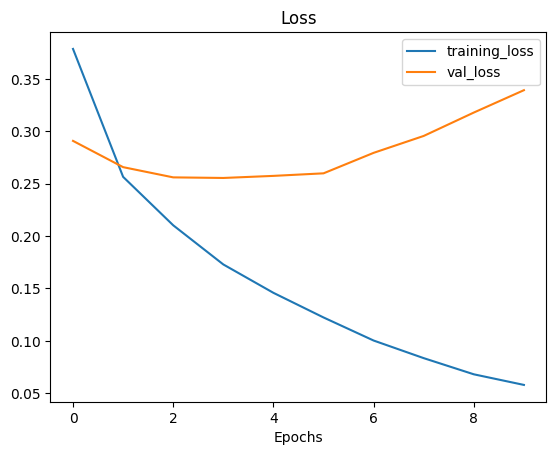

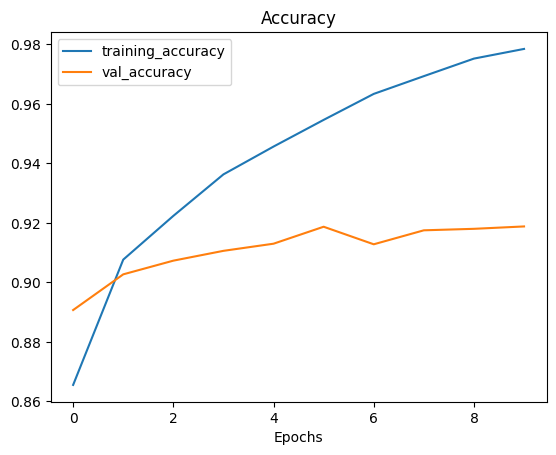

In [6]:
model = ez.build_CNN(input_shape, [('c', 64), ('p', 2)], dense=[128])
model, history = ez.run_model(model, X_train, y_train, X_validate=X_test, y_validate=y_test, outputs=10, epochs=10)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________